# Import Library Dependencies

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import os
import random

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense 
from tensorflow.keras.preprocessing import image

# Accessing Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Use ImageDataGen

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = [.99,1.01],brightness_range = [0.8,1.2],data_format = "channels_last",fill_mode = "constant", horizontal_flip = True,validation_split=0.2)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/animals',target_size = (180,180),batch_size = 64,class_mode = 'categorical',subset = 'training')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/animals',target_size = (180,180),batch_size = 64,class_mode = 'categorical',subset = 'validation')

Found 4328 images belonging to 90 classes.
Found 1082 images belonging to 90 classes.


# Initializing The Model

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='elu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='selu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3),activation='gelu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(128,activation='relu'))
model.add(Dense(90,activation='softmax'))

# Compile The Model File

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

**TRAINING THE MODEL**

In [ ]:
model.fit(training_set,steps_per_epoch=len(training_set),epochs=10,validation_data=test_set,validation_steps=len(test_set),use_multiprocessing=True)

Epoch 1/10
68/68 [==============================] - 134s 2s/step - loss: 0.0639 - accuracy: 0.9811 - val_loss: 8.1014 - val_accuracy: 0.3595
Epoch 2/10
68/68 [==============================] - 129s 2s/step - loss: 0.0519 - accuracy: 0.9866 - val_loss: 7.6064 - val_accuracy: 0.3808
Epoch 3/10
68/68 [==============================] - 132s 2s/step - loss: 0.0401 - accuracy: 0.9896 - val_loss: 8.1384 - val_accuracy: 0.3651
Epoch 4/10
68/68 [==============================] - 131s 2s/step - loss: 0.0669 - accuracy: 0.9806 - val_loss: 7.7409 - val_accuracy: 0.3706
Epoch 5/10
68/68 [==============================] - 129s 2s/step - loss: 0.0320 - accuracy: 0.9912 - val_loss: 7.8647 - val_accuracy: 0.3799
Epoch 6/10
68/68 [==============================] - 128s 2s/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 8.2339 - val_accuracy: 0.3734
Epoch 7/10
68/68 [==============================] - 133s 2s/step - loss: 0.0297 - accuracy: 0.9928 - val_loss: 8.2174 - val_accuracy: 0.3669
Epoch 8/10
68

**SAVING THE MODEL**

In [ ]:
model.save("MyAnimalCNNModel.h5")

In [ ]:
all_classes = os.listdir("/content/drive/MyDrive/animals")
print(all_classes)

['leopard', 'cow', 'hamster', 'crow', 'duck', 'dog', 'antelope', 'mouse', 'eagle', 'goat', 'lion', 'crab', 'squid', 'hyena', 'oyster', 'sparrow', 'hippopotamus', 'gorilla', 'reindeer', 'badger', 'kangaroo', 'rhinoceros', 'butterfly', 'whale', 'panda', 'jellyfish', 'squirrel', 'snake', 'chimpanzee', 'flamingo', 'dolphin', 'beetle', 'swan', 'pigeon', 'possum', 'cat', 'boar', 'bee', 'cockroach', 'turkey', 'hedgehog', 'coyote', 'elephant', 'bat', 'hornbill', 'dragonfly', 'zebra', 'bison', 'mosquito', 'wolf', 'ladybugs', 'hummingbird', 'wombat', 'shark', 'caterpillar', 'sandpiper', 'goose', 'porcupine', 'starfish', 'goldfish', 'pig', 'raccoon', 'hare', 'moth', 'octopus', 'lobster', 'donkey', 'horse', 'orangutan', 'seal', 'pelecaniformes', 'otter', 'woodpecker', 'rat', 'turtle', 'penguin', 'ox', 'owl', 'parrot', 'koala', 'lizard', 'sheep', 'deer', 'tiger', 'seahorse', 'fox', 'okapi', 'bear', 'fly', 'grasshopper']


In [ ]:
class_names = all_classes

# Test Model

In [ ]:
from PIL import Image

# test image
img = Image.open('test.jpg')

# resizing the image
img = img.resize((224, 224))

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model = load_model("/content/animals.h5")
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
prediction = model.predict(x)
pred = np.argmax(prediction,axis = 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


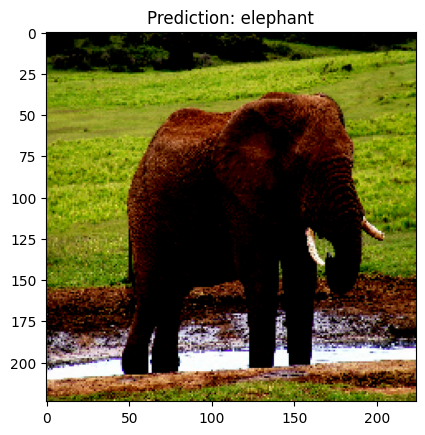

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
r=np.argmax(prediction)
plt.title(f'Prediction: {class_names[r]}')
plt.show()